In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 437, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 437 (delta 154), reused 132 (delta 128), pack-reused 231
Receiving objects: 100% (437/437), 12.86 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.4 MB/s eta 0:00:00


In [2]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join("groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))
!mkdir -p weights
%cd weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
import os
%cd /content/GroundingDINO
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join("weights/groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/GroundingDINO/weights
/content/GroundingDINO
weights/groundingdino_swint_ogc.pth ; exist: True


In [3]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
DEVICE

device(type='cuda')

In [5]:
from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [74]:
SOURCE_IMAGE_PATH = "/content/test.png"
CLASSES = ['sunglass'] #add the class name to be labeled automatically
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.15

In [75]:
import supervision as svn
from typing import List
def enhance_class_name(class_names: List[str]) -> List[str]:
   return [
       f"all {class_name}s"
       for class_name
       in class_names
   ]
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
   image=image,
   classes=enhance_class_name(class_names=CLASSES),
   box_threshold=BOX_TRESHOLD,
   text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = svn.BoxAnnotator()
labels = [f"{CLASSES[class_id]} {confidence:0.2f}"for _, confidence, class_id,_ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)



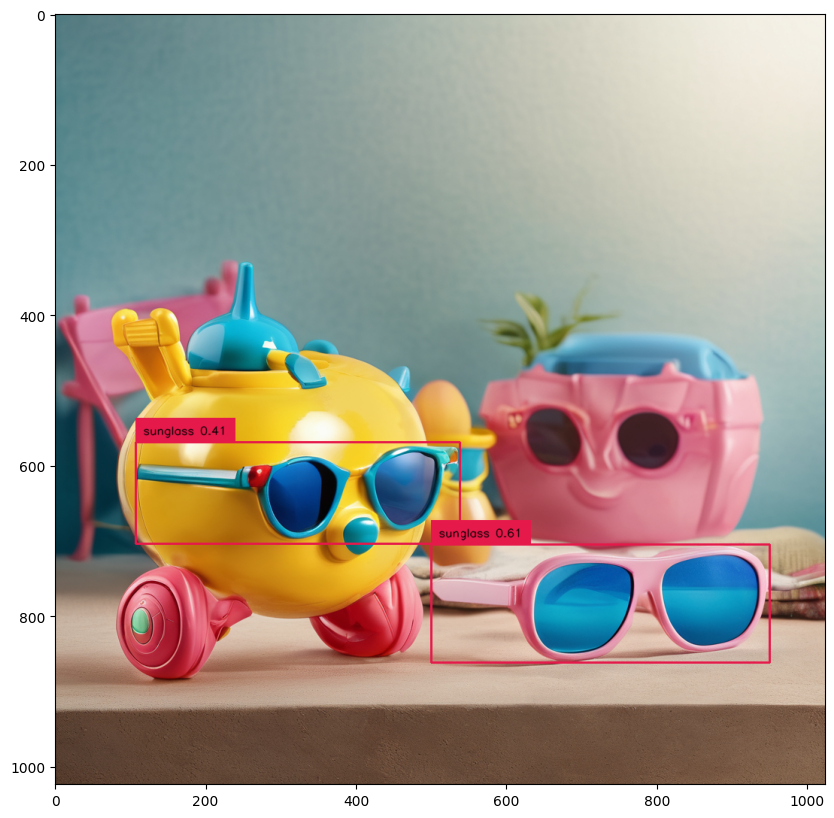

In [76]:
%matplotlib inline
svn.plot_image(annotated_frame, (10, 10))